In [15]:
# Import all required packages
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath
import seaborn as sns

# refresh

# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# This is a quick script intended to be used to classify the sources into Alpha bins based on moved fraction


# Based on something like this. In our quick analysis we are only considering the Alpha bins from 0 to 50

# Alpha	Quiescent	Star Forming (VJ >0.5)	Star Forming (VJ <0.5)	Dusty
# 0	0.0	0.000000	0.000000	0.000000	0.000000
# 1	10.0	0.100288	0.053567	0.026047	0.137492
# 2	20.0	0.186021	0.096860	0.048387	0.247190
# 3	30.0	0.260914	0.134219	0.068025	0.337960
# 4	40.0	0.327321	0.167330	0.085585	0.414995
# 5	50.0	0.386867	0.197124	0.101484	0.481609
# 6	60.0	0.440738	0.224211	0.116019	0.540057
# 7	70.0	0.489829	0.249023	0.129406	0.591938
# 8	80.0	0.534838	0.271889	0.141811	0.638432
# 9	90.0	0.576318	0.293066	0.153363	0.680434
# 10	100.0	0.614721	0.312760	0.164167	0.718636

# read in data
decomposed_ids = pd.read_csv('Decomposed_UVJ_Ids.csv')

In [17]:
decomposed_ids


,Unnamed: 0,id,VJ_withAGN,UV_withAGN,VJ_withoutAGN,UV_withoutAGN,GalaxyType,GalaxyType_NoAGN,GalaxyType_Changed,GalaxyType_100,vector_magnitude,vector_direction,field
0,0,CDFS_22468,1.090045,0.790783,1.883585,0.970620,1.0,2.0,1,2.0,0.813663,0.222862,CDFS
1,4,CDFS_11857,0.613108,0.918184,0.508098,0.913174,1.0,1.0,0,1.0,0.105129,-3.093922,CDFS
2,6,CDFS_18441,0.670256,0.961630,0.557744,0.955997,1.0,1.0,0,1.0,0.112653,-3.091572,CDFS
3,8,CDFS_15163,0.487994,0.717532,0.409449,0.702274,1.0,1.0,0,1.0,0.080013,-2.949730,CDFS
4,15,CDFS_25294,1.410461,1.696627,1.448004,1.869882,2.0,0.0,1,0.0,0.177276,1.357402,CDFS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,263,UDS_7946,1.065337,1.685944,1.085887,1.834912,0.0,0.0,0,0.0,0.150379,1.433713,UDS
144,266,UDS_15368,1.439351,1.815656,1.448004,1.869882,0.0,0.0,0,0.0,0.054912,1.412557,UDS
145,267,UDS_15080,1.223027,1.926246,1.192023,1.923775,0.0,0.0,0,0.0,0.031102,-3.062079,UDS
146,268,UDS_9060,1.065288,1.685613,1.085887,1.834912,0.0,0.0,0,0.0,0.150714,1.433689,UDS


In [18]:

# get rid of the first column
decomposed_ids = decomposed_ids.drop('Unnamed: 0', axis=1)

In [19]:
def classify_alpha(distance_moved):
    if distance_moved <0.1:
        return 0
    elif distance_moved <0.186:
        return 1
    elif distance_moved <0.261:
        return 2
    elif distance_moved <0.327:
        return 3
    elif distance_moved <0.387:
        return 4
    elif distance_moved <0.441:
        return 5
    elif distance_moved <0.49:
        return 6
    elif distance_moved <0.535:
        return 7
    elif distance_moved <0.576:
        return 8
    elif distance_moved <0.615:
        return 9
    else:
        return 10
    

In [20]:
# classify our individual galaxies into bins
decomposed_ids['Alpha'] = decomposed_ids['vector_magnitude'].apply(lambda x: classify_alpha(x))

In [21]:
decomposed_ids

,id,VJ_withAGN,UV_withAGN,VJ_withoutAGN,UV_withoutAGN,GalaxyType,GalaxyType_NoAGN,GalaxyType_Changed,GalaxyType_100,vector_magnitude,vector_direction,field,Alpha
0,CDFS_22468,1.090045,0.790783,1.883585,0.970620,1.0,2.0,1,2.0,0.813663,0.222862,CDFS,10
1,CDFS_11857,0.613108,0.918184,0.508098,0.913174,1.0,1.0,0,1.0,0.105129,-3.093922,CDFS,1
2,CDFS_18441,0.670256,0.961630,0.557744,0.955997,1.0,1.0,0,1.0,0.112653,-3.091572,CDFS,1
3,CDFS_15163,0.487994,0.717532,0.409449,0.702274,1.0,1.0,0,1.0,0.080013,-2.949730,CDFS,0
4,CDFS_25294,1.410461,1.696627,1.448004,1.869882,2.0,0.0,1,0.0,0.177276,1.357402,CDFS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,UDS_7946,1.065337,1.685944,1.085887,1.834912,0.0,0.0,0,0.0,0.150379,1.433713,UDS,1
144,UDS_15368,1.439351,1.815656,1.448004,1.869882,0.0,0.0,0,0.0,0.054912,1.412557,UDS,0
145,UDS_15080,1.223027,1.926246,1.192023,1.923775,0.0,0.0,0,0.0,0.031102,-3.062079,UDS,0
146,UDS_9060,1.065288,1.685613,1.085887,1.834912,0.0,0.0,0,0.0,0.150714,1.433689,UDS,1


In [22]:
# We would like to check this distribution
decomposed_ids['Alpha'].value_counts()

1     63
0     62
2     14
3      4
4      3
6      1
10     1
Name: Alpha, dtype: int64

In [24]:
# Lets investigate the distribution of the Alpha bins: exploring alpha values of 2, 3, and 4
decomposed_ids[decomposed_ids['Alpha'].isin([2,3,4, 5, 6, 7, 8, 9, 10])]

,id,VJ_withAGN,UV_withAGN,VJ_withoutAGN,UV_withoutAGN,GalaxyType,GalaxyType_NoAGN,GalaxyType_Changed,GalaxyType_100,vector_magnitude,vector_direction,field,Alpha
0,CDFS_22468,1.090045,0.790783,1.883585,0.970620,1.0,2.0,1,2.0,0.813663,0.222862,CDFS,10
5,CDFS_20666,1.024110,1.096586,1.106698,1.410744,1.0,1.0,0,1.0,0.324833,1.313728,CDFS,3
18,CDFS_25286,1.057045,1.632863,1.085887,1.834912,0.0,0.0,0,0.0,0.204098,1.429006,CDFS,2
30,CDFS_17608,1.405123,1.664525,1.453587,1.876290,2.0,0.0,1,0.0,0.217240,1.345814,CDFS,2
31,COSMOS_12282,0.671814,0.705815,0.733106,0.910699,1.0,1.0,0,1.0,0.213855,1.280113,COSMOS,2
46,COSMOS_5842,1.199529,1.736695,1.231910,1.959097,0.0,0.0,0,0.0,0.224748,1.426218,COSMOS,2
51,COSMOS_11075,1.054080,1.217510,1.106698,1.410744,1.0,1.0,0,1.0,0.200270,1.304939,COSMOS,2
52,COSMOS_13302,1.057115,1.633305,1.085887,1.834912,0.0,0.0,0,0.0,0.203650,1.429040,COSMOS,2
55,COSMOS_7125,1.305476,1.342860,1.106698,1.410744,2.0,1.0,1,1.0,0.210050,2.812502,COSMOS,2
65,COSMOS_11831,1.093357,1.211908,1.106698,1.410744,1.0,1.0,0,1.0,0.199283,1.503803,COSMOS,2


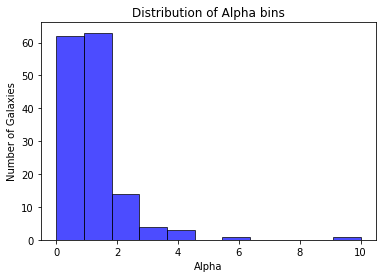

In [27]:
# plot the distribution
plt.hist(decomposed_ids['Alpha'], bins=11, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Alpha')
plt.ylabel('Number of Galaxies')
plt.title('Distribution of Alpha bins')

plt.show()

In [ ]:
# Another thing we could do is given our selection of AGN-less galaxies, we could put these SEDs back through my code, adding the AGN component back in to see if we can recreate at what point is the AGN component matching the observed SEDs
# At this point, this should tell us our AGN fraction (alpha value)